In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import statsmodels.api as sm
from statsmodels.formula.api import ols

## ANÁLISE DE ULTRASSOM 

Começamos por analisar tabela de dados disponíveis. Os dados são de duas sondas de 1MHz e 2Mhz. Os valores da sonda de 1MHz estão representados por 'S1', e os valores da outra sonda por 'S2'. Foram utilizados três cilindros, sendo C1, C2 e C3. Logo, os dados do cilindro 1 retirados pela sonda 1(1MHz) serão representados como C1S1, e assim sucessivamente.

In [3]:
df = pd.read_excel('excel 7.xlsx', 'Folha1')
display(df.head(3))

,depth[mm],Amp[V]C1S1,depth[mm]2,Amp[V]C1S2,depth[mm]3,Amp[V]C2S1,depth[mm].1,Amp[V]C2S2,depth[mm]2.1,Amp[V]C3S1,depth[mm]3.1,Amp[V]C3S2
0,0.0,0.342,0.0,0.119,0.0,0.347,0.0,0.117,0.0,0.345,0.0,0.117
1,0.1,0.414,0.1,0.407,0.1,0.418,0.1,0.394,0.1,0.416,0.1,0.395
2,0.2,0.476,0.2,0.758,0.2,0.480,0.2,0.745,0.2,0.479,0.2,0.747


A partir da biblioteca seaborn, obtém-se os gráficos de cada um dos cilindros com ambas as sondas. Podia-se usar a função do matplotlib.pyplot para ver o gráfico, mas para análise de muitos valores recomenda-se a utilização do seaborn, pois o mesmo obtém uma interface prática e fácil de usar. 

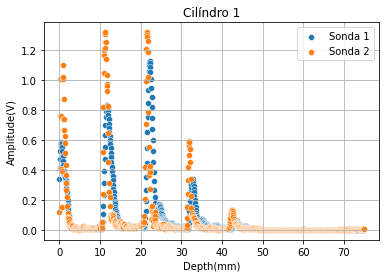

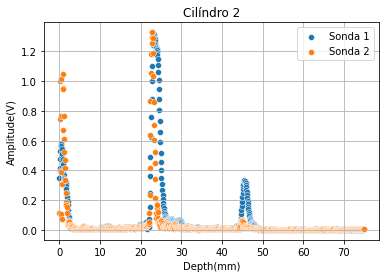

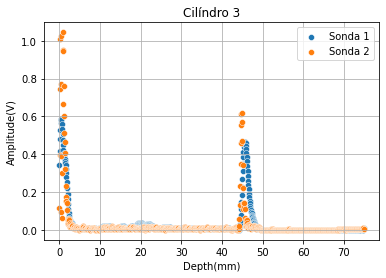

In [4]:
fig = sns.scatterplot(data=df, x="depth[mm]", y="Amp[V]C1S1")
fig = sns.scatterplot(data=df, x= 'depth[mm]', y= 'Amp[V]C1S2')
plt.legend(labels=["Sonda 1","Sonda 2"])
plt.title('Cilíndro 1')
plt.xlabel('Depth(mm)')
plt.ylabel('Amplitude(V)')
plt.grid()
plt.show()

fig2 = sns.scatterplot(data=df, x="depth[mm]", y="Amp[V]C2S1")
fig2 = sns.scatterplot(data=df, x= 'depth[mm]', y= 'Amp[V]C2S2')
plt.legend(labels=["Sonda 1","Sonda 2"])
plt.title('Cilíndro 2')
plt.xlabel('Depth(mm)')
plt.ylabel('Amplitude(V)')
plt.grid()
plt.show()

fig3 = sns.scatterplot(data=df, x="depth[mm]", y="Amp[V]C3S1")
fig3 = sns.scatterplot(data=df, x= 'depth[mm]', y= 'Amp[V]C3S2')
plt.legend(labels=["Sonda 1","Sonda 2"])
plt.title('Cilíndro 3')
plt.xlabel('Depth(mm)')
plt.ylabel('Amplitude(V)')
plt.grid()
plt.show()

Utiliza-se a biblioteca pandas para encontrar valores máximos no meio dos dados.

In [11]:
print('A Amplitude 1 do Cilindro 1 com a Sonda 1 é:', df.loc[266:400, 'Amp[V]C1S1'].max())
print('A Amplitude 2 do Cilindro 1 com a Sonda 1 é:', df.loc[400:533, 'Amp[V]C1S1'].max())
print('A Amplitude 1 do Cilindro 2 com a Sonda 1 é:', df.loc[266:400, 'Amp[V]C2S1'].max())
print('A Amplitude 2 do Cilindro 2 com a Sonda 1 é:', df.loc[533:666, 'Amp[V]C2S1'].max())

A Amplitude 1 do Cilindro 1 com a Sonda 1 é: 1.126
A Amplitude 2 do Cilindro 1 com a Sonda 1 é: 0.34
A Amplitude 1 do Cilindro 2 com a Sonda 1 é: 1.316
A Amplitude 2 do Cilindro 2 com a Sonda 1 é: 0.333


In [12]:
print('A Amplitude1 do Cilíndro 1 com a Sonda 2 é:', df.loc[266:400, 'Amp[V]C1S2'].max())
print('A Amplitude2 do Cilíndro 1 com a Sonda 2 é:', df.loc[400:533, 'Amp[V]C1S2'].max())
print('A Amplitude1 do Cilíndro 2 com a Sonda 2 é:', df.loc[266:400, 'Amp[V]C2S2'].max())
print('A Amplitude2 do Cilíndro 2 com a Sonda 2 é:', df.loc[533:666, 'Amp[V]C2S2'].max())

A Amplitude1 do Cilíndro 1 com a Sonda 2 é: 1.32
A Amplitude2 do Cilíndro 1 com a Sonda 2 é: 0.591
A Amplitude1 do Cilíndro 2 com a Sonda 2 é: 1.329
A Amplitude2 do Cilíndro 2 com a Sonda 2 é: 0.068


Nota-se que a sonda 2 obtém valores maiores para os picos, o que reflete numa maior precisão de penetração no material em estudo(blocos de acrílico de diferentes tamanhos).

## AVALIAÇÃO DO DESEMPENHO TRANSDUTORES A-SCAN E B-SCAN

Agora, será utilizado um bloco de acrílico com defeitos. Estes defeitos serão tema de estudo para avaliar o desempenho das sondas. Escolhe-se 3 defeitos para estudar em particular, denominados defeitos 1,2 e 3.

In [13]:
df2 = pd.read_excel('t7.xls', 'Folha1')
display(df.head(3))

,depth[mm],Amp[V]C1S1,depth[mm]2,Amp[V]C1S2,depth[mm]3,Amp[V]C2S1,depth[mm].1,Amp[V]C2S2,depth[mm]2.1,Amp[V]C3S1,depth[mm]3.1,Amp[V]C3S2
0,0.0,0.342,0.0,0.119,0.0,0.347,0.0,0.117,0.0,0.345,0.0,0.117
1,0.1,0.414,0.1,0.407,0.1,0.418,0.1,0.394,0.1,0.416,0.1,0.395
2,0.2,0.476,0.2,0.758,0.2,0.480,0.2,0.745,0.2,0.479,0.2,0.747


A partir dos dados, é possível obter gráficos que representem os defeitos a serem estudados. Espera-se que os picos no gráficos correspondem as distâncias dos respetivos defeitos.

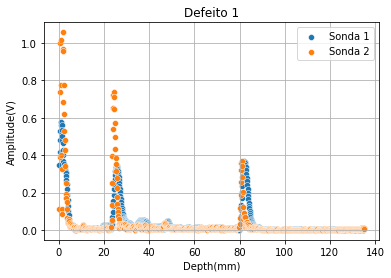

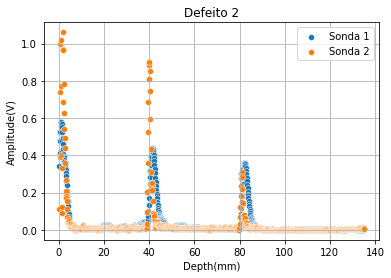

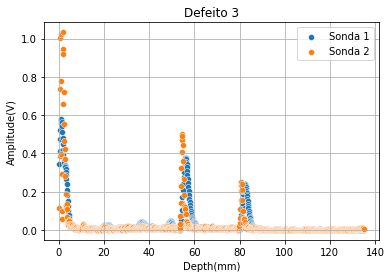

In [14]:
fig = sns.scatterplot(data = df2, x= 'depth[mm]', y= 'Amp[V]D3S1')
fig = sns.scatterplot(data = df2, x= 'depth[mm]', y= 'Amp[V]D3S2')
plt.title('Defeito 1')
plt.legend(labels=['Sonda 1', 'Sonda 2'])
plt.xlabel('Depth(mm)')
plt.ylabel('Amplitude(V)')
plt.grid()
plt.show()

fig2 = sns.scatterplot(data = df2, x= 'depth[mm]', y= 'Amp[V]D5S1')
fig2 = sns.scatterplot(data = df2, x= 'depth[mm]', y= 'Amp[V]D5S2')
plt.title('Defeito 2')
plt.legend(labels=['Sonda 1', 'Sonda 2'])
plt.xlabel('Depth(mm)')
plt.ylabel('Amplitude(V)')
plt.grid()
plt.show()

fig3 = sns.scatterplot(data = df2, x= 'depth[mm]', y= 'Amp[V]D7S1')
fig3 = sns.scatterplot(data = df2, x= 'depth[mm]', y= 'Amp[V]D7S2')
plt.title('Defeito 3')
plt.legend(labels=['Sonda 1', 'Sonda 2'])
plt.xlabel('Depth(mm)')
plt.ylabel('Amplitude(V)')
plt.grid()
plt.show()

Mede-se as distâncias manualmente para termos um parâmetro de erro. Distância 1 = 23mm, Distância 2 = 38.8mm e Distância 3 = 54.1mm. A partir do gráfico consegue-se obter os valores das distâncias medidas pelas sondas.

In [16]:
dist_medD3 = 23
dest_medD5 = 38.8
dist_medD7 = 54.1
print('A distância do defeito 1 pela sonda 1 é:', 25.5,', com erro:', ((25.5-23)/23*100))
print('A distância do defeito 1 pela sonda 2 é:', 24.5,', com erro:', ((24.5-23)/23*100))
print('A distância do defeito 2 pela sonda 1 é:', 41.9,', com erro:', ((41.9-38.8)/38.8*100))
print('A distância do defeito 2 pela sonda 2 é:', 40.3,', com erro:', ((40.3-38.8)/38.8*100))
print('A distância do defeito 3 pela sonda 1 é:', 56.5,', com erro:', ((56.5-54.1)/54.1*100))
print('A distância do defeito 3 pela sonda 2 é:', 54.9,', com erro:', ((54.9-54.1)/54.1*100))

A distância do defeito 1 pela sonda 1 é: 25.5 , com erro: 10.869565217391305
A distância do defeito 1 pela sonda 2 é: 24.5 , com erro: 6.521739130434782
A distância do defeito 2 pela sonda 1 é: 41.9 , com erro: 7.98969072164949
A distância do defeito 2 pela sonda 2 é: 40.3 , com erro: 3.865979381443299
A distância do defeito 3 pela sonda 1 é: 56.5 , com erro: 4.436229205175598
A distância do defeito 3 pela sonda 2 é: 54.9 , com erro: 1.4787430683918616


Novamente, vê-se que a sonda 2 é mais precisa, com um erro percentual menor.

Foi feita uma análise rápida e simples no python de uma experiência laborial.

## DECAIMENTO FLUORECENTE

Estudemos agora um decaimento fluorecente dum Led. O decaimento é muito rápido sendo feito a partir de um software no computador. Coleta-se os dados(40000 dados).

In [17]:
df3 = pd.read_excel("C:/Users/luqis/Downloads/T6 (1).xlsx", '4.3')
df_new = df3.drop(['Coluna1', 'Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10', 'Unnamed: 11','Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'], axis=1)
display(df_new.head(5))

,time,Y[0],Ln(Y)
0,0.000000,0.751022,-0.286320
1,0.000025,0.758672,-0.276186
2,0.000050,0.754847,-0.281240
3,0.000075,0.749747,-0.288019
4,0.000100,0.751022,-0.286320


Para vermos o decaimento faz-se um gráfico:

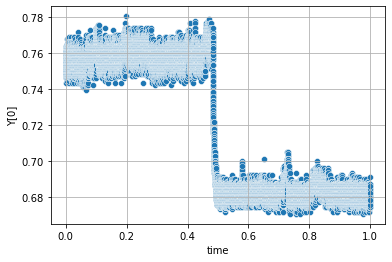

In [18]:
fig_new = sns.scatterplot(data=df_new, x="time", y="Y[0]")
plt.grid()
plt.show()

É útil estudarmos o momento do decaimento, para isso será necessário selecionar os dados deste intervalo, e para isso utiliza-se a biblioteca pandas para selecionarmos os dados num intervalo fechado.

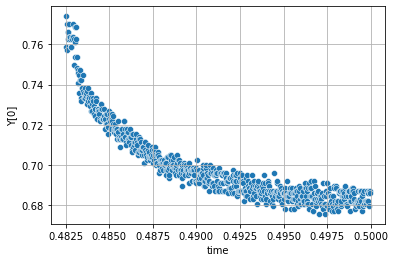

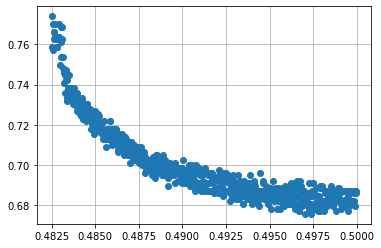

In [21]:
dfn = df_new.iloc[19300:20000, 0:2]
fign = sns.scatterplot(data=dfn, x="time", y="Y[0]")
plt.grid()
plt.show()

X = np.array(dfn["time"])
Y = np.array(dfn["Y[0]"])
plt.plot(X, Y, 'o')
plt.grid()
plt.show()

Temos os dados do inicio da queda, e para analisarmos melhor é útil termos a regressão linear; e, para isso, utiliza-se a biblioteca statsmodels que nos retorna o equivalente a função ProjLin do excel.

In [22]:
ajuste = sm.OLS(Y, sm.add_constant(X)).fit()
print(ajuste.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          4.37e-207
Time:                        22:14:35   Log-Likelihood:                 2225.4
No. Observations:                 700   AIC:                            -4447.
Df Residuals:                     698   BIC:                            -4438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3575      0.037     63.598      0.0

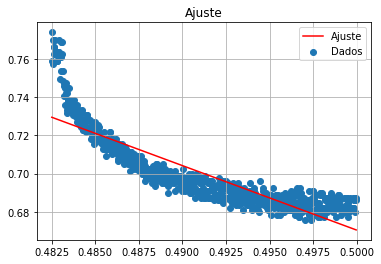

In [29]:
#print(f'Os valores do ajuste linear são: {ajuste.predict()}')
plt.scatter(X,Y)
plt.plot(X, ajuste.predict(), color="r")
plt.legend(labels =['Ajuste', 'Dados'])
plt.title('Ajuste')
plt.grid()
plt.show()

Por fim, faz-se o gráfico de resíduos para vermos se os dados coletados estão satisfatórios ou não.

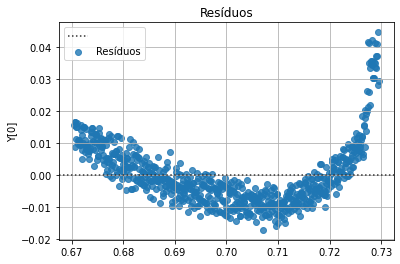

In [26]:
modelo_ajust_y = ajuste.fittedvalues # Valores do modelo ajustados
modelo_residuos = ajuste.resid # Residuos
dataframe = pd.concat([dfn['time'], dfn['Y[0]']], axis=1)
figura = sns.residplot(modelo_ajust_y, dataframe.columns[-1], data = dataframe)
plt.legend(labels=['', 'Resíduos'])
plt.title('Resíduos')
plt.grid()
plt.show()

## DETERMINAÇÃO DE MATERIAL A PARTIR DO SEU COMPORTAMENTO TÉRMICO

A partir de um sistema submerso em óleo de silicone e que será aquecido e arrefecido, determinar qual coeficiente de temperatura do material em estudo , e, assim, determinar qual o material. Para os dados, serão coletados a temperatura, a resistência e corrente.

In [31]:
data = pd.read_excel("Trabalho 1.xlsx", 'Planilha1')
display(dados.head())

,T(K)aq,Rcu(ohm)aq,I(A)aq,Ganho(aq),ln(I)aq,1/T(aq),T(K)arr,Rcu(ohm)arr,I(A)arr,Ganho(arr),...,Rsemi(ohm),Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,T(ºC).1,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,298.15,108.6,2.500000e-07,1.000000,-15.201805,0.003354,340.15,129.5,1.800000e-07,1.192449,...,NaN,NaN,NaN,NaN,NaN,80,0.33,NaN,NaN,NaN
1,299.15,108.6,1.800000e-07,1.000000,-15.530309,0.003343,339.15,129.0,1.700000e-07,1.187845,...,NaN,NaN,NaN,NaN,NaN,79,0.27,NaN,0.004656,-0.387560
2,300.15,108.7,1.200000e-07,1.000921,-15.935774,0.003332,338.15,128.7,1.600000e-07,1.185083,...,298.15,NaN,NaN,NaN,NaN,78,0.27,NaN,0.000014,0.004545
3,301.15,109.0,9.000000e-08,1.003683,-16.223456,0.003321,337.15,128.3,1.500000e-07,1.181400,...,108.60,NaN,NaN,NaN,NaN,77,0.25,NaN,0.999617,0.001158
4,302.15,109.2,8.000000e-08,1.005525,-16.341239,0.003310,336.15,127.8,1.400000e-07,1.176796,...,NaN,NaN,NaN,NaN,NaN,76,0.24,NaN,107036.302825,41.000000


A partir dos dados, pode-se fazer o gráfico do aquecimento e arrefecimento. Nota-se que o arrefecimento é mais preciso o que faz sentido, uma vez que o aquecimento demora a começar e no início não é uniforme o que causa pontos duvidosos.

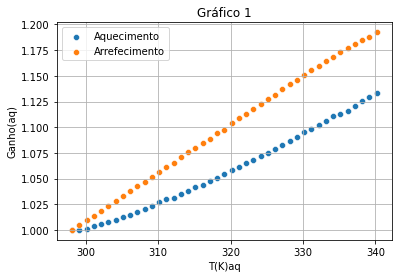

In [35]:
fig1 = sns.scatterplot(data = data, x = 'T(K)aq', y = 'Ganho(aq)')
fig1 = sns.scatterplot(data = data, x = 'T(K)arr', y = 'Ganho(arr)')
plt.title('Gráfico 1')
plt.legend(['Aquecimento', 'Arrefecimento'])
plt.grid()
plt.show()

Faz-se a regressão linear do aquecimento:

In [38]:
X1 = np.array(data["T(K)aq"])
Y1 = np.array(data["Ganho(aq)"])
X_aq = X1[~np.isnan(X1)]
Y_aq = Y1[~np.isnan(Y1)]
ajuste_aq = sm.OLS(Y_aq, sm.add_constant(X_aq)).fit()
print(ajuste_aq.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5140.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.03e-44
Time:                        22:35:44   Log-Likelihood:                 180.42
No. Observations:                  43   AIC:                            -356.8
Df Residuals:                      41   BIC:                            -353.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.015      0.613      0.5

Faz-se a regressão linear do arrefecimento:

In [39]:
X2 = np.array(data["T(K)arr"])
Y2 = np.array(data["Ganho(arr)"])
X_arr = X2[~np.isnan(X1)]
Y_arr = Y2[~np.isnan(Y1)]
ajuste_arr = sm.OLS(Y_arr, sm.add_constant(X_arr)).fit()
print(ajuste_arr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.070e+05
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.11e-71
Time:                        22:35:49   Log-Likelihood:                 230.73
No. Observations:                  43   AIC:                            -457.5
Df Residuals:                      41   BIC:                            -453.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3876      0.005    -85.266      0.0

A partir dos dados do ajuste linear, pode-se fazer o gráfico dos dados com os repetivos ajustes.

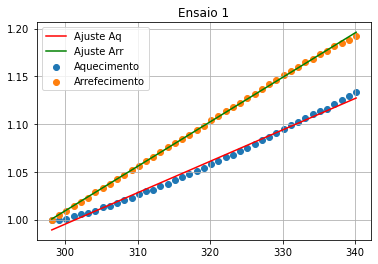

In [40]:
plt.scatter(X_aq, Y_aq)
plt.scatter(X_arr, Y_arr)
plt.plot(X_aq, ajuste_aq.predict(), color = "r")
plt.plot(X_arr, ajuste_arr.predict(), color = "g")
plt.legend(['Ajuste Aq', 'Ajuste Arr', 'Aquecimento', 'Arrefecimento'])
plt.title('Ensaio 1')
plt.grid()
plt.show()

E, a partir da regressão linear e sabendo as fórmulas necessárias, calcula-se os valores de alfa(coeficiente de temperatura). O alfa é calculado a partir do declive do gráfico, sendo na realidade o próprio declive. Sabe-se que na experiência é utilizado um filamento de cobre que tem um coeficiente de temperatura $\alpha = 0.00393$.

In [45]:
alfa1 = 0.0033
alfa2 = 0.0047
alfa = (alfa1 + alfa2 )/2
alfa_t = 3.93e-3
print(f'O valor de alfa para o aquecimento é de: {alfa1}')
print(f'O valor de alfa para o arrefecimento é de: {alfa2}')
print(f'A média entre os valores é: {alfa}')
print(f'O erro associado ao valor de alfa é: {(abs(alfa-alfa_t)/alfa_t)*100}%')

O valor de alfa para o aquecimento é de: 0.0033
O valor de alfa para o arrefecimento é de: 0.0047
A média entre os valores é: 0.004
O erro associado ao valor de alfa é: 1.781170483460553%
